In [1]:
#importaciones
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mpldates

In [2]:
#lectura de datos
events = pd.read_csv('data/events.csv.gzip', compression='gzip', 
                     dtype={
                         'device_countrycode': 'category', 
                         'device_city': 'category',
                         'ref_type': 'category',
                         'application_id': 'category',
                         'device_os_version': 'category',
                         'device_brand': 'category',
                         'device_model': 'category',
                         'session_user_agent': 'category',
                         'trans_id': 'category',
                         'user_agent': 'category',
                         'carrier': 'category',
                         'kind': 'category',
                         'device_os': 'category',
                         'device_os_version': 'category',
                         'device_language': 'category',
                         'connection_type': 'category',
                         'wifi': 'category'
                     })

In [3]:
events.dtypes

date                    object
event_id                 int64
ref_type              category
ref_hash                 int64
application_id        category
attributed                bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              category
user_agent            category
event_uuid              object
carrier               category
kind                  category
device_os             category
wifi                  category
connection_type       category
ip_address               int64
device_language       category
dtype: object

In [4]:
events.wifi.dtype

CategoricalDtype(categories=[u'false', u'true'], ordered=False)

In [5]:
# Empecemos por explorar events

events.describe()

,event_id,ref_hash,ip_address
count,2.494423e+06,2.494423e+06,2.494423e+06
mean,9.970445e+01,4.641486e+18,4.620786e+18
std,1.070903e+02,2.660724e+18,2.672746e+18
min,0.000000e+00,1.633675e+14,5.287755e+12
25%,2.200000e+01,2.326142e+18,2.333410e+18
50%,3.100000e+01,4.688964e+18,4.541498e+18
75%,1.610000e+02,6.927594e+18,7.044307e+18
max,7.120000e+02,9.223316e+18,9.223367e+18


In [6]:
events.sample(10)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
1757527,2019-03-12 16:16:27.840,31,1891515180541284343,6205447520410952037,63,False,6333597102633388268,NaN,3.083058605577787e+17,8.528024712396659e+18,...,NaN,1.2128570569651484e+18,2c7ba296-8a2f-445c-bcca-d532bec0da64,NaN,8.820572319511919e+18,NaN,true,NaN,5831076896943120582,6.977049253562486e+18
1492435,2019-03-08 05:06:31.148,355,1891515180541284343,8675807797732397296,149,False,6333597102633388268,NaN,3.083058605577787e+17,4.4551077593802383e+18,...,NaN,6.895887105550264e+17,2ab93ef4-5f7c-42c6-a2c6-e622ea2114b6,NaN,3.002210223888017e+18,NaN,true,NaN,758369160046994682,6.977049253562486e+18
391480,2019-03-12 18:54:22.892,138,1891515180541284343,4074100526322838268,57,False,6333597102633388268,NaN,3.083058605577787e+17,2.0664313823771248e+17,...,NaN,7.72027024220892e+18,c94ce16b-b6df-41aa-956d-05f000456471,NaN,4.647948847353587e+18,NaN,true,NaN,6586849487961128061,9.0283826551012e+18
213964,2019-03-06 05:18:03.644,273,1891515180541284343,6007918079734074460,121,False,6333597102633388268,NaN,3.083058605577787e+17,3.4096141721326387e+18,...,NaN,2.0692826472659261e+18,2cee04a4-e00c-449d-bd9b-289685fe456d,NaN,4.821815004439628e+18,NaN,true,NaN,3029692009685226520,9.0283826551012e+18
492276,2019-03-12 00:58:48.399,31,1891515180541284343,7426748650883226611,145,False,6333597102633388268,7.008467012956373e+18,NaN,6.026543327929208e+18,...,NaN,NaN,97fc0c3f-41aa-43bb-ad9b-03ee0d11f6d6,NaN,5.104972432847709e+18,NaN,NaN,NaN,5447002153094371230,6.804427935983149e+18
1500654,2019-03-05 21:47:02.584,304,1891515180541284343,670222787403677375,149,False,6333597102633388268,NaN,3.083058605577787e+17,8.895856737269065e+17,...,NaN,8.978644434180779e+18,f0ceea1b-de65-4d82-9618-db02c5ef30f8,NaN,2.6667146999915704e+18,NaN,false,NaN,7271068654202407113,6.977049253562486e+18
961125,2019-03-13 01:10:23.167,31,1494519392962156891,4567810790657872227,212,False,6333597102633388268,4.3537503246500966e+18,NaN,5.580204962374873e+18,...,NaN,NaN,7c825743-c88d-4ef0-9930-09e5f6b024b7,NaN,5.104972432847709e+18,NaN,NaN,NaN,8588656039268122151,6.804427935983149e+18
1928178,2019-03-09 01:12:14.787,31,1891515180541284343,5995117446721462539,63,False,6333597102633388268,NaN,3.083058605577787e+17,1.5409071305566963e+18,...,NaN,2.9554935318608517e+18,d6ea7c65-cf2b-48cd-a5e2-f48a2f70e7b1,NaN,8.820572319511919e+18,NaN,true,NaN,3871319085385976564,6.977049253562486e+18
1243337,2019-03-08 02:09:17.243,155,1891515180541284343,8095120060949598775,63,False,6333597102633388268,NaN,3.083058605577787e+17,2.4354500947795727e+18,...,NaN,8.089178157941562e+18,c3803df1-c67e-48e9-8f96-08aaede54e78,NaN,5.913921070048764e+18,NaN,false,NaN,8646439603194644792,6.977049253562486e+18
2197195,2019-03-07 01:00:25.534,22,1891515180541284343,5114237350015425470,66,False,6333597102633388268,NaN,5.1379920467642125e+17,8.1970971712005e+18,...,NaN,8.895329623296023e+17,f3310d94-75f7-4553-8cf4-07eac33ed373,NaN,5.500848327478996e+18,NaN,false,NaN,4002102055366128231,6.977049253562486e+18


In [7]:
# ¿Cuántos registros tiene?
events.size

54877306

In [8]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [9]:
# elimino las filas que tengan todos sus valores en NaN
events.dropna(how='all')

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18
5,2019-03-09 20:29:45.449,4,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,bb8a02a1-622e-47c5-8eb0-36679cb4f8be,2.2481569642543155e+17,2.4645942301908767e+18,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18
6,2019-03-09 20:29:40.602,5,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,eab8937b-2841-4e53-821b-ad5bfcf0d29d,2.2481569642543155e+17,4.956614591795591e+18,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18
7,2019-03-09 20:45:12.067,0,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,c5cac55d-468c-493a-a4da-9b13f277804f,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18
8,2019-03-09 20:40:07.977,0,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,e381d11e-0cd9-4388-8e71-0348bb54c6ef,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18
9,2019-03-09 20:27:09.984,1,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,6f3dde45-638f-4be6-8e57-945d44b4fd8f,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [10]:
events.size

54877306

In [11]:
# cuántos device_countrycode hay?
events['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

Hay un solo countrycode

# Cuántas ciudades distintas hay?

In [12]:
# cuántos device_city hay?
events['device_city'].value_counts()

3.8000799488967747e+18    561876
2.551781375196177e+18      11193
3.2582150459884605e+18      4442
8.223209269143922e+18       4393
8.578626579239988e+17       2497
8.985217056239735e+18       2203
7.602876036620469e+18       1945
6.276065650874414e+17       1924
2.0489923564619796e+18      1851
5.801433683024338e+18       1848
6.102141091106202e+18       1591
1.16468287562278e+18        1123
4.4246229588650675e+18      1061
4.1122184524297533e+18       958
1.1895429525854325e+17       912
4.847858242945663e+17        756
8.235236537216161e+18        744
6.959330348495504e+18        713
2.715324676035127e+18        631
1.2816911001604083e+18       599
5.847627926933047e+18        591
8.318795483645021e+18        574
6.434016956850084e+17        514
1.3535971026191767e+18       505
7.425634410263832e+18        486
7.60148454103576e+18         472
5.261773315746305e+18        425
1.0840811693621105e+18       413
8.127301688691997e+17        380
2.3023179601912517e+18       285
          

Hay 127 ciudades distintas. Evidentemente, los datos que nos han cedido corresponden a un solo país.

In [13]:
# los cambio a tipo category
events['device_countrycode'] = events['device_countrycode'].astype('category')
events['device_city'] = events['device_city'].astype('category')

In [14]:
events['ref_type'].value_counts()


1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

In [15]:
#lo paso a category
events['ref_type'] = events['ref_type'].astype('category')

In [16]:
events['ref_hash'].value_counts()

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
7932055701089699678    1880
959309904051180368     1879
2172957424689981672    1737
8938936221115319274    1712
5517347051664000025    1696
7881865551295335841    1680
2911380620292361100    1615
7984059267284799536    1599
3931396627810108588    1558
5929807100024800254    1460
8291491622395815056    1431
6431911391083614553    1398
6290225060459708362    1384
1392381574052047210    1369
524370095063968889     1355
5639133576747886119    1345
2456256724056711249    1339
8847676025636425100    1336
3436575239155975568    1317
6630253456783010456    1312
                       ... 
157629049434270787        1
2404462553287446258       1
9194020315316075441       1
7813739129937447890       1
7252925027847170864 

In [17]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
91          3
62          3
33          3
232         3
228         2
135         2
36          2
209         2
206         2
49          2
81          2
117         2
188         2
11          2
290         2
165         1
158         1
25          1
305         1
295         1
154         1
286         1
86          1
132         1
146         1
240         1
245         1
255         1
155         1
322         1
Name: application_id, Length: 269, dtype: int64

In [18]:
events['application_id'] = events['application_id'].astype('category')

In [19]:
events['device_os_version'].value_counts()

4.3537503246500966e+18    277691
7.391843585977942e+18     104170
8.824598512074042e+18      77947
1.6273135773546924e+18     58099
4.823236647981168e+18      47501
2.85370396744477e+18       46823
2.635068060671423e+18      41978
5.908703034097298e+17      38321
8.530335778938208e+17      33964
8.218259696094497e+18      31563
4.584084460548654e+18      30944
7.008467012956373e+18      27302
5.940957351303096e+18      24224
4.466870626275729e+18      21876
8.840145871557405e+18      20197
5.577468495817814e+18      19307
8.913929730553542e+18      15515
3.56844623815159e+18       14698
8.806974323879854e+18      14174
5.432641194361306e+18       9740
4.967033121496544e+18       6970
4.953783083284584e+18       6270
6.10686129079723e+18        4304
5.668904594719908e+18       4191
2.628777490844412e+18       3824
5.568789074483471e+18       3669
5.034511441443622e+18       2803
4.646970999381444e+18       2771
6.965265633862224e+18       2260
5.438928456834394e+18       2260
          

In [20]:
events['device_os_version'] = events['device_os_version'].astype('category')

In [21]:
events['device_brand'].value_counts()

3.083058605577787e+17     579861
3.812620986737351e+18     115538
2.208834667126999e+18     113636
2.987569314309514e+18     107472
2.5232459822329236e+18     94672
5.1379920467642125e+17     39432
3.2285160909036396e+18     15589
2.262848417324907e+18      12325
6.538561794435555e+18      11839
1.083368711068078e+18       9667
4.371307750970993e+18       8604
3.742387098176767e+18       6825
1.9103272551269105e+18      5919
8.230045013295288e+17       5256
7.512612244959867e+18       3052
5.937501462472654e+18       2867
6.111646853627296e+18       2862
8.255276631056499e+18       2416
5.588755459133625e+18       2101
3.093165991971729e+18       2076
2.370132235094487e+18       2004
6.751007869822716e+18       1902
5.645691558423168e+18       1899
4.043700875052048e+18       1441
5.951324980112395e+18       1228
3.8494904260895846e+18      1114
4.1137519177429806e+18       995
7.855185525087771e+18        912
1.8829174247592527e+18       670
7.465674792046323e+18        516
          

In [22]:
events['device_brand'] = events['device_brand'].astype('category')

In [23]:
events['device_model'].value_counts()

2.33194661091417e+18      210697
7.787530752469096e+18      74780
9.14903648623246e+18       66279
2.0664313823771248e+17     60168
4.4452523127597215e+18     56241
1.7545278564638182e+18     53850
8.163782690166159e+18      48814
7.11634310093634e+18       44598
2.9282623200704937e+18     41494
5.990116681709081e+18      40935
1.26767685640937e+18       38870
1.1876609915140178e+17     38629
3.624089450035605e+18      37489
4.281729328614173e+18      36006
6.598698943038051e+18      30656
1.1813182677101786e+18     26846
6.026543327929208e+18      26460
3.686066659168077e+17      26275
1.5409071305566963e+18     25154
2.4354500947795727e+18     24645
4.5454901435473823e+18     24201
4.689550129432457e+18      22497
8.604122202547542e+18      22268
1.764701447250044e+18      21661
4.4305786865637033e+18     20316
2.1369349693676014e+18     19213
6.88241452041436e+18       19122
8.535198356827955e+18      18648
8.733768846357008e+18      17953
4.349815524632825e+18      17790
          

In [24]:
events['device_model'] = events['device_model'].astype('category')

In [25]:
events['session_user_agent'].value_counts()

3.819516403548394e+18     1461049
7.164321382499455e+18      649962
1.1609515031332844e+18      78232
2.394269162455642e+18       11210
3.8316191210585426e+18      10838
6.59386819643465e+18         9911
2.4958048761062277e+18       7391
7.512089018183668e+18        6995
7.738334399785623e+18        6770
7.72027024220892e+18         6626
5.254247406123229e+18        6450
4.3922650149309645e+18       5998
9.177081431590678e+18        5615
1.2440622242452342e+18       5525
3.5907478428344975e+18       5448
6.840860440298272e+18        5055
1.637986409760501e+18        4872
5.407281900521064e+18        4619
5.51960942967474e+18         3914
4.525726530677256e+18        3724
4.47207748927856e+18         3657
4.185911564152913e+18        3436
6.10522694935703e+18         3412
8.089178157941562e+18        3326
2.9554935318608517e+18       3267
4.2591543230719636e+18       3194
4.455209013830674e+18        3008
6.36894744937942e+18         3004
6.091499354492879e+18        2755
8.227344568093

In [26]:
events['session_user_agent'] = events['session_user_agent'].astype('category')

In [27]:
events['trans_id'].value_counts()

{hash}                                                                                                           33
0                                                                                                                16
103430dcab4b60eb4f                                                                                                9
433f38e2c758468ab632dcab7281d4be_Y2NhPTEwLzI1LzIwMTggMTA6Mjk6MjUgUE0mb2ZmZXJJZD0zMzQ1NjQ0NiZhZmZJZD0yMjMyNzUx     7
210a4c5786d249c78bb30237abcac890_Y2NhPTQvMjEvMjAxOCA1OjI2OjM3IFBNJm9mZmVySWQ9MzM0NTY0NDYmYWZmSWQ9MTY2MTgxNQ==     6
77ca31a9-b0e0-4884-8de8-c2ee74f1cc32                                                                              2
0941bb7b-866f-4d5a-9b85-63e77b27d562                                                                              2
1901171053a509cd7317f2c6                                                                                          2
57d62969                                                                

In [28]:
events['trans_id'] = events['trans_id'].astype('category')

In [29]:
events['user_agent'].value_counts()

2.394269162455642e+18     42325
7.72027024220892e+18      37523
6.59386819643465e+18      36173
5.930547337170416e+18     35950
5.254247406123229e+18     32902
6.10522694935703e+18      31554
3.43749743931221e+18      28317
7.738334399785623e+18     27218
4.3922650149309645e+18    23386
2.948343093474511e+18     19773
6.741680180239527e+18     19404
5.323194805072353e+18     18277
8.234145808386622e+18     17985
4.185911564152913e+18     17157
1.2440622242452342e+18    16243
6.840860440298272e+18     15798
1.637986409760501e+18     15196
2.4958048761062277e+18    15085
9.177081431590678e+18     14872
2.9554935318608517e+18    13923
5.144382081229548e+18     13033
5.407281900521064e+18     11255
3.5907478428344975e+18    10571
8.089178157941562e+18     10551
8.22734456809323e+18      10066
6.322452758521056e+18      9284
8.301989661429948e+17      9100
4.47207748927856e+18       8390
2.6795308969710915e+18     8253
5.0990105183075226e+17     8160
                          ...  
5.293566

In [30]:
events['user_agent'] = events['user_agent'].astype('category')

In [31]:
events['event_uuid'].value_counts()

f3277538-2a0d-46ce-97bd-c5a65f2c675b    1
4c38c512-bd0f-406a-9e11-00c2a2f7fd60    1
c714ee80-84a1-4b46-b38d-da943d1e4f2f    1
a38038ab-8656-4261-b6a7-22894e77de8c    1
880c6f30-ceeb-4293-96f2-ca2b3c34aa20    1
015319bc-0293-4724-aeb3-2c98e6eaedff    1
bd667987-1e45-49aa-8758-ba3f4a3f3a78    1
009d7ae7-73f1-43e9-9fe2-a0ead12f88c1    1
13ef2557-1144-4049-b5f8-f4c1e64ed877    1
e6f823ba-efd6-4579-b3b2-8fab79d07988    1
a9a7f53e-78c2-41d9-a6f1-3aeef7180cf3    1
45fa1338-3c9e-4ed6-bf40-649d8288a7e8    1
d452b520-21dd-41e5-b395-4d0ff0b3e068    1
211bc31c-25b7-4dd7-b175-9b0a0117f298    1
e1bff7f4-e873-46a2-933f-d4defed34965    1
848bc0b0-f55e-42f5-919d-bbfaff6a6ffb    1
13692e64-eb54-4657-82c7-41d45a02d766    1
1cdaf94b-d0e5-4575-8dcb-69c4d29aca13    1
59ad1c3c-8c53-4673-9e99-52b6035a7bc5    1
03aa48a5-6ec8-4534-a560-816183729fb6    1
88522f1d-55ec-476f-adf5-3447b53d0d65    1
4e639eaf-4ba6-4f05-ba12-dc5c4f10b699    1
082b09b5-8912-43cd-8bf0-4caf38a1d84b    1
b70317b2-8d08-4a80-8e75-9985a708a3

In [32]:
# son más de 2 millones, esto no es una categoría
events['carrier'].value_counts()

2.2481569642543155e+17    436983
1.1795872560140132e+18     80958
7.855224497172788e+18      58478
6.948827726700092e+18      29574
3.570805180856832e+18       3457
4.890488855514004e+18       2527
7.232922439046282e+18       1491
7.216101851670709e+18        539
1.7576903483791066e+18       464
3.1349838132534666e+18       336
2.58683288719403e+18         311
8.005033990448529e+18        227
2.276828313171018e+17        185
3.751135050063284e+18        145
5.851845794617676e+18        121
1.4010825245156086e+18        73
3.550680419448072e+18         66
5.255184358353569e+18         58
5.926614067260969e+18         36
6.046846537041924e+18         33
2.1988510698396652e+18        29
1.8329019614137016e+18        17
4.699500034143047e+18         17
7.87498164012504e+18          15
4.958858478611984e+17         15
1.312636194459128e+18         15
5.0624501543466e+17           14
2.580400656600893e+18         14
8.628827427227626e+18         14
5.268425616448026e+18         14
          

In [33]:
events['carrier'] = events['carrier'].astype('category')

In [34]:
events['kind'].value_counts()

5.500848327478996e+18     618217
5.104972432847709e+18     300632
9.066787919123543e+18     217846
9.977660181316936e+17     151445
8.820572319511919e+18     110045
4.647948847353587e+18     100029
3.2090781690992343e+18     84898
2.3767496212528297e+18     56489
7.320635661394365e+18      52726
4.0176741840411725e+18     43936
5.5715199625661126e+17     42101
4.074559116314067e+18      39892
5.913921070048764e+18      38067
4.821815004439628e+18      37056
5.059134271513848e+18      35588
8.370513340818052e+18      26228
4.853173252142275e+18      24296
6.51420806757284e+18       23444
6.168308581888314e+18      22788
6.794944093927819e+18      18599
1.2869764740456515e+18     14408
7.499875431243801e+18      13940
5.735892088608821e+18      13455
5.882882097123621e+18      12953
7.310429127362015e+17      11853
2.481896960094684e+18      11711
7.00532667621659e+18       11678
6.417927117224306e+18      10939
8.569825701272477e+18      10860
9.01838557291685e+18       10213
          

In [35]:
events['kind'] = events['kind'].astype('category')

In [36]:
events['device_os'].value_counts()

7.531669329342818e+18     389811
6.941824626260379e+18     260861
2.7488313570525307e+18      6110
5.916186881232351e+18        885
Name: device_os, dtype: int64

In [37]:
events['device_os'] = events['device_os'].astype('category')

In [38]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [39]:
events['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [40]:
events['connection_type'].dtype

CategoricalDtype(categories=[u'Cable/DSL', u'Cellular', u'Corporate'], ordered=False)

In [41]:
events['connection_type'].memory_usage(deep=True)

2494736

In [42]:
events['connection_type'] = events['connection_type'].astype('category')

In [43]:
events['connection_type'].dtype

CategoricalDtype(categories=[u'Cable/DSL', u'Cellular', u'Corporate'], ordered=False)

In [44]:
events['connection_type'].memory_usage(deep=True)

2494736

In [45]:
events['ip_address'].value_counts()

1992632945768888579    22640
3162368506662488065    19379
7726314782926052608    17704
2394721645995561079     9777
589886713227299026      7561
7833422721300884983     7197
3564864895681659759     7142
4537476465028897433     7140
2403839579048525602     7100
7410847412569818934     7065
8235954648733428120     6933
7481987231813232849     6855
1093212093074216349     6347
8010533080341024188     6241
2441645233986204328     6108
2706357072127963511     4993
8262991154202232888     4736
1037699812701179191     4554
2988221197536288219     4408
2322330997698851930     3901
6286868732416664667     3698
8928734162578817363     3519
8531002764348621869     2710
7326588564616977029     2595
6452955265823183819     2571
7571354015197421297     2556
7858558567428669000     2520
3222899837426106171     2518
3692763185030977380     2450
6324037615828123965     2408
                       ...  
8354349022722988350        1
7810143944060388432        1
21847751496269070          1
76769657022625

In [46]:
events['device_language'].value_counts()

6.977049253562486e+18     745898
3.3013777759776993e+18    589865
9.0283826551012e+18       388832
6.804427935983149e+18     340624
4.621024053086952e+18     150143
4.077062198952597e+17      53277
2.822843369618519e+17      28294
4.060929664968129e+18      25943
3.095855928498728e+18      25635
6.111820034171223e+18      18314
1.5264214271539814e+18     10181
1.1932786179815933e+18      6968
6.035179960508536e+18       3681
3.1772649501524695e+18      3077
3.695787044360519e+17       2622
6.535228344298127e+18       2201
2.554250790954083e+18       1465
1.1015391524827163e+17       845
5.649026280217904e+18        740
4.073834886007358e+18        553
5.061641824384339e+18        441
7.77431571166467e+18         399
3.7887455341954785e+18       395
3.915023192723985e+18        339
1.5158880551616256e+18       335
4.594650153337342e+18        305
2.4883657416061665e+18       305
5.84621722065469e+18         284
8.149693170391004e+18        233
7.687656459658518e+17        230
          

In [47]:
events['device_language'] = events['device_language'].astype('category')

In [48]:
events.memory_usage(deep=True)

Index                        72
date                  169620764
event_id               19955384
ref_type                2494631
ref_hash               19955384
application_id          5011907
attributed              2494423
device_countrycode      2494567
device_os_version       2502336
device_brand            5015630
device_model            5244351
device_city             5002363
session_user_agent      5126407
trans_id                2496150
user_agent              5490868
event_uuid            201798412
carrier                 2502539
kind                    5047878
device_os               2494848
wifi                    2494602
connection_type         2494664
ip_address             19955384
device_language         5006279
dtype: int64

In [49]:
# desecho el país porque es siempre el mismo. No me suma información
del events['device_countrycode']

In [50]:
events.memory_usage(deep=True)

Index                        72
date                  169620764
event_id               19955384
ref_type                2494631
ref_hash               19955384
application_id          5011907
attributed              2494423
device_os_version       2502336
device_brand            5015630
device_model            5244351
device_city             5002363
session_user_agent      5126407
trans_id                2496150
user_agent              5490868
event_uuid            201798412
carrier                 2502539
kind                    5047878
device_os               2494848
wifi                    2494602
connection_type         2494664
ip_address             19955384
device_language         5006279
dtype: int64

Ahora terminé de transformar en categorías los valores más repetidos, con esto liberé un poco de memoria para trabajar más rápido.

# Empiezo a hacer preguntas

## Qué eventos son más comunes?

In [51]:
events['kind'].value_counts()

5.500848327478996e+18     618217
5.104972432847709e+18     300632
9.066787919123543e+18     217846
9.977660181316936e+17     151445
8.820572319511919e+18     110045
4.647948847353587e+18     100029
3.2090781690992343e+18     84898
2.3767496212528297e+18     56489
7.320635661394365e+18      52726
4.0176741840411725e+18     43936
5.5715199625661126e+17     42101
4.074559116314067e+18      39892
5.913921070048764e+18      38067
4.821815004439628e+18      37056
5.059134271513848e+18      35588
8.370513340818052e+18      26228
4.853173252142275e+18      24296
6.51420806757284e+18       23444
6.168308581888314e+18      22788
6.794944093927819e+18      18599
1.2869764740456515e+18     14408
7.499875431243801e+18      13940
5.735892088608821e+18      13455
5.882882097123621e+18      12953
7.310429127362015e+17      11853
2.481896960094684e+18      11711
7.00532667621659e+18       11678
6.417927117224306e+18      10939
8.569825701272477e+18      10860
9.01838557291685e+18       10213
          

In [64]:
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
cantidad_eventos_por_tipo = events.groupby('kind')['event_id'].count().sort_values(ascending=False).head(10)
cantidad_eventos_por_tipo

kind
5.500848327478996e+18     618217
5.104972432847709e+18     300632
9.066787919123543e+18     217846
9.977660181316936e+17     151445
8.820572319511919e+18     110045
4.647948847353587e+18     100029
3.2090781690992343e+18     84898
2.3767496212528297e+18     56489
7.320635661394365e+18      52726
4.0176741840411725e+18     43936
Name: event_id, dtype: int64

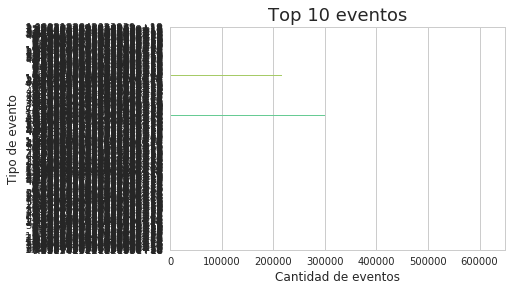

In [67]:
g = sns.barplot(x=cantidad_eventos_por_tipo.values, y=cantidad_eventos_por_tipo.index, orient='h', palette="hls")
g.set_title("Top 10 eventos", fontsize=18)
g.set_xlabel("Cantidad de eventos", fontsize=12)
g.set_ylabel("Tipo de evento", fontsize=12)
plt.subplots_adjust(top=0.9)

In [53]:
cantidad_eventos_por_tipo.values

array([618217, 300632, 217846, 151445, 110045, 100029,  84898,  56489,
        52726,  43936])

## Hay una relación entre los eventos y el día de la semana?

In [54]:
events['date'] = pd.to_datetime(events['date'])

In [58]:
events['dayofweek'] = events['date'].dt.dayofweek

In [59]:
events.groupby('dayofweek')['event_id'].count()

dayofweek
0    268884
1    537214
2    569772
3    253706
4    285535
5    286221
6    293091
Name: event_id, dtype: int64

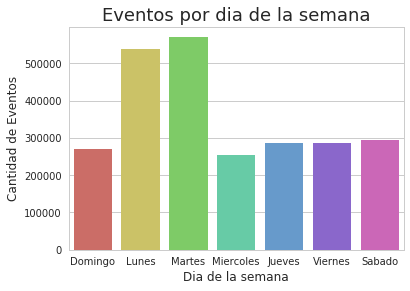

In [63]:
eventos_por_dia_de_semana = events.groupby('dayofweek')['event_id'].count()
g = sns.barplot(x=['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado'], y=eventos_por_dia_de_semana.values, orient='v', palette="hls")
g.set_title("Eventos por dia de la semana", fontsize=18)
g.set_xlabel("Dia de la semana", fontsize=12)
g.set_ylabel("Cantidad de Eventos", fontsize=12)
plt.subplots_adjust(top=0.9)

## Hay una relación entre los eventos y el mes en que estamos?

In [69]:
events['month'] = events['date'].dt.month
events.groupby('month')['event_id'].count()

month
3    2494423
Name: event_id, dtype: int64

Al parecer todos los datos corresponden al mes de Abril (Enero=0)

## Hay una relación entre los eventos y el dispositivo que se usa?

In [70]:
events['hour'] = events['date'].dt.hour
events['hour']

0           0
1           0
2           0
3           0
4          21
5          20
6          20
7          20
8          20
9          20
10         20
11         20
12         20
13         20
14         20
15         20
16         20
17         20
18         20
19         20
20         20
21         20
22         20
23         20
24         20
25         20
26         20
27         20
28         20
29         20
           ..
2494393    14
2494394     2
2494395    22
2494396    22
2494397    22
2494398    22
2494399    15
2494400     0
2494401     0
2494402     0
2494403     2
2494404     2
2494405    23
2494406    23
2494407    23
2494408    18
2494409    18
2494410    18
2494411     0
2494412    15
2494413    15
2494414    21
2494415    21
2494416    16
2494417    16
2494418    10
2494419    22
2494420    22
2494421    14
2494422    18
Name: hour, Length: 2494423, dtype: int64

## En qué días y horarios se da la mayor cantidad de eventos?

Text(42,0.5,'Hora')

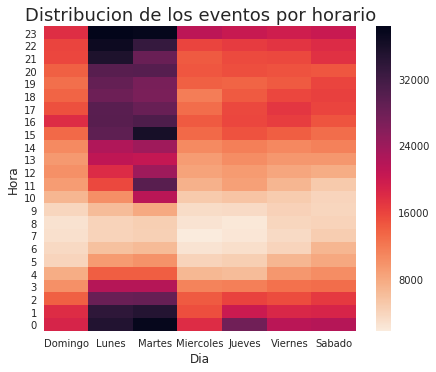

In [77]:
eventos_dia_hora = events.groupby(["dayofweek","hour"])["event_id",].count()
pivot_post = eventos_dia_hora.pivot_table(index="hour", columns="dayofweek", values= "event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, xticklabels=['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado'], cmap=cmap)
g.set_title("Distribucion de los eventos por horario", fontsize=18)
g.set_xlabel("Dia", fontsize=12)
g.set_ylabel("Hora", fontsize=12)

Text(42,0.5,'Hora')

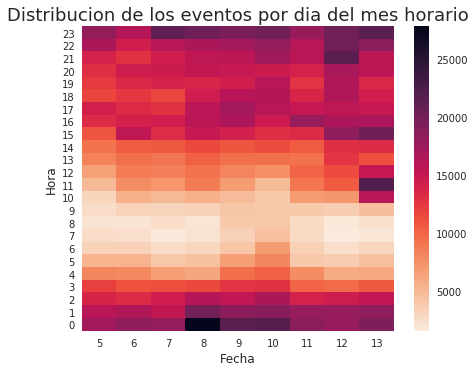

In [95]:
events["day"] = events["date"].dt.day
eventos_dia_del_mes_hora = events.groupby(["day","hour"])["event_id",].count()
pivot_post = eventos_dia_del_mes_hora.pivot_table(index="hour", columns="day", values= "event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribucion de los eventos por dia del mes horario", fontsize=18)
g.set_xlabel("Fecha", fontsize=12)
g.set_ylabel("Hora", fontsize=12)

## Hay una relación entre algún tipo de evento y la ciudad?

In [101]:
eventos_por_tipo_ciudad = events.groupby(["device_city", "kind"])['event_id',].count()
eventos_por_tipo_ciudad

event_id
device_city            kind                            
1.0840811693621105e+18 1.0892133843023939e+18       NaN
                       1.6563223891614241e+18       NaN
                       2.1075935208469972e+18       NaN
                       2.404150911237027e+18        NaN
                       2.4645942301908767e+18       NaN
                       2.4772724646814203e+18       NaN
                       2.564145725267859e+18        NaN
                       3.2040948978572534e+18       NaN
                       3.384507282270512e+17        NaN
                       3.4799321853891236e+18       NaN
                       3.511769859555669e+18        NaN
                       3.6165537239121797e+18       NaN
                       3.6498748815498537e+18       NaN
                       3.7449261418550707e+18       NaN
                       3.8181136862523633e+18       NaN
                       3.8848596540592865e+18       NaN
                       3.950512715088653e+18        NaN
                       3.9595250720179963e+18       NaN
                       3.991959134911789e+18        NaN
                       4.17265515780122e+18         NaN
                       4.510630249067179e+18        NaN
                       4.5833388099797786e+18       NaN
                       4.956614591795591e+18        NaN
                       5.148713255096809e+18        NaN
                       5.37646449870323e+17         NaN
                       5.455064549483251e+18        NaN
                       5.500848327478996e+18        NaN
                       5.516623012570946e+18        NaN
                       5.775530062890707e+18        NaN
                       5.800153412043482e+18        NaN
...                                                 ...
2.887475017904211e+18  6.529595168169902e+18        NaN
                       7.310429127362015e+17        NaN
                       8.189929103863038e+18        NaN
                       8.210459666847846e+18        NaN
                       1.0030107346383939e+18       NaN
                       1.0772805117502975e+18       NaN
                       3.355424689298487e+18        NaN
                       4.309396518425585e+18        NaN
                       6.097112130180949e+18        NaN
                       7.361843095678323e+18        NaN
                       8.765326698185905e+18        NaN
                       7.989347374959774e+18        NaN
                       8.833804438801752e+18        NaN
                       1.7060082899499889e+18       NaN
                       6.058383514806756e+18        NaN
                       8.615504956175203e+18        NaN
                       2.1363607996738337e+18       NaN
                       3.9568678667173366e+18       NaN
                       4.631541600481005e+18        NaN
                       7.312174893241169e+18        NaN
                       7.73658639556426e+17         NaN
                       2.1514367295560906e+18       NaN
                       3.1887425909788913e+18       NaN
                       5.24073989882085e+18         NaN
                       6.195433350651948e+18        NaN
                       6.649155874988479e+18        NaN
                       1.4497712628732416e+18       NaN
                       3.3520700030203315e+18       NaN
                       6.818241515712069e+18        NaN
                       7.251762312137193e+18        NaN

[74041 rows x 1 columns]

Text(42,0.5,'Tipo de Evento')

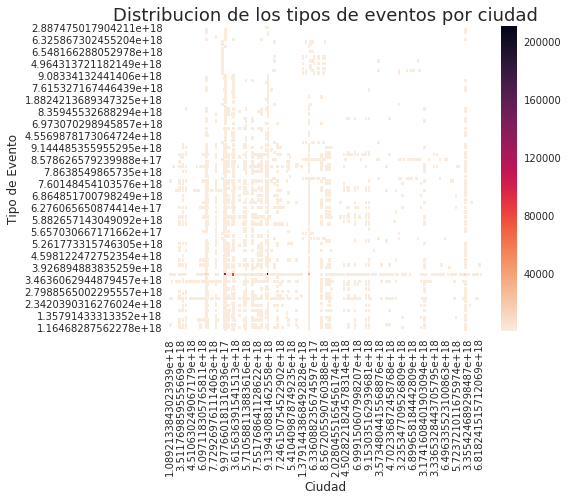

In [102]:
pivot_post = eventos_por_tipo_ciudad.pivot_table(index="device_city", columns="kind", values="event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribucion de los tipos de eventos por ciudad", fontsize=18)
g.set_xlabel("Ciudad", fontsize=12)
g.set_ylabel("Tipo de Evento", fontsize=12)

## Qué dispositivo se usa en cada la ciudad?

In [103]:
dipositivo_por_ciudad = events.groupby(["device_city", "device_brand"])['event_id',].count()
dipositivo_por_ciudad

event_id
device_city            device_brand                    
1.0840811693621105e+18 1.083368711068078e+18        NaN
                       2.208834667126999e+18        NaN
                       3.083058605577787e+17        NaN
                       3.812620986737351e+18        NaN
                       5.1379920467642125e+17       NaN
                       5.185901324752864e+18        NaN
                       5.588755459133625e+18        NaN
                       5.785735136024376e+17        NaN
                       7.97262313950176e+18         NaN
                       1.280056370771215e+18        NaN
                       1.619581446714784e+18        NaN
                       1.6679603354061018e+18       NaN
                       1.8829174247592527e+18       NaN
                       2.262848417324907e+18        NaN
                       2.370132235094487e+18        NaN
                       2.5232459822329236e+18       NaN
                       2.776400652041713e+18        NaN
                       2.987569314309514e+18        NaN
                       3.093165991971729e+18        NaN
                       3.2285160909036396e+18       NaN
                       3.742387098176767e+18        NaN
                       4.1137519177429806e+18       NaN
                       4.371307750970993e+18        NaN
                       4.994101372019545e+18        NaN
                       5.645691558423168e+18        NaN
                       5.937501462472654e+18        NaN
                       6.111646853627296e+18        NaN
                       6.538561794435555e+18        NaN
                       6.751007869822716e+18        NaN
                       6.820360148347398e+18        NaN
...                                                 ...
2.887475017904211e+18  4.2322932292689935e+18       NaN
                       4.268211727430926e+18        NaN
                       6.521400989943291e+18        NaN
                       7.597382259149133e+18        NaN
                       2.1695037301560579e+18       NaN
                       4.672409028324332e+17        NaN
                       5.78431634405713e+18         NaN
                       3.2815484456076293e+18       NaN
                       3.624089450035605e+18        NaN
                       4.1890225218996413e+18       NaN
                       8.081274400524402e+18        NaN
                       3.265491610599788e+18        NaN
                       2.606960612845661e+18        NaN
                       2.7422482188038554e+18       NaN
                       9.032030997022273e+18        NaN
                       6.709370344976139e+18        NaN
                       4.5700574344819133e+18       NaN
                       2.4434325627689795e+18       NaN
                       2.8059788291423923e+18       NaN
                       7.071537552116215e+18        NaN
                       3.833810677186203e+17        NaN
                       7.420430704605125e+18        NaN
                       6.127621457088335e+18        NaN
                       3.3705219610064794e+18       NaN
                       7.013711285598757e+18        NaN
                       8.412517547311859e+18        NaN
                       1.3776256670286917e+18       NaN
                       4.580007230075633e+18        NaN
                       3.4242797791182403e+18       NaN
                       8.645767265847268e+18        NaN

[31750 rows x 1 columns]